In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from typing import List, Tuple

import sys
sys.path.append("..")
from util import print_answer

%matplotlib inline

## 1. Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма).

В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241.

In [2]:
df = pd.read_csv("gbm-data.csv")
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = df.loc[:, "D1":"D1776"].values
y = df["Activity"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

## 2. Обучите GradientBoostingClassifier

с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:


* Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), где y_pred — предсказанное значение.

In [ ]:
def sigmoid(y_pred: np.array) -> np.array:
    return 1.0 / (1.0 + np.exp(-y_pred))

* Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.

In [ ]:
def log_loss_results(model, X: np.array, y: np.array) -> List[float]:
    return [log_loss(y, sigmoid(y_pred)) for y_pred in model.staged_decision_function(X)]

* Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.

Learning rate: 1
      Iter       Train Loss   Remaining Time 
         1           1.0190           20.63s
         2           0.9192           22.66s
         3           0.8272           19.07s
         4           0.7834           16.71s
         5           0.7109           15.43s
         6           0.6368           15.06s
         7           0.5797           14.76s
         8           0.5610           14.10s
         9           0.5185           13.62s
        10           0.4984           13.07s
        20           0.1999           12.06s
        30           0.1313           11.25s
        40           0.0790           11.00s
        50           0.0511           10.53s
        60           0.0352           10.06s
        70           0.0245            9.25s
        80           0.0162            8.59s
        90           0.0114            7.99s
       100           0.0077            7.52s
       200           0.0004            2.19s


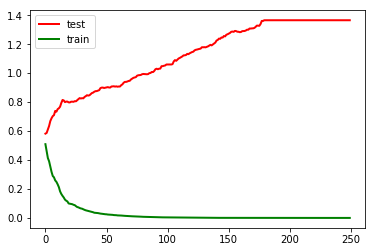

Min loss 0.58 at n_estimators=1

Learning rate: 0.5
      Iter       Train Loss   Remaining Time 
         1           1.1255           19.78s
         2           1.0035           18.16s
         3           0.9386           17.15s
         4           0.8844           15.60s
         5           0.8381           14.59s
         6           0.7995           13.73s
         7           0.7559           13.11s
         8           0.7205           12.78s
         9           0.6958           12.72s
        10           0.6725           12.42s
        20           0.4672           10.85s
        30           0.3179           10.27s
        40           0.2274            9.78s
        50           0.1774            9.21s
        60           0.1394            8.71s
        70           0.1050            8.26s
        80           0.0805            7.74s
        90           0.0650            7.21s
       100           0.0511            6.78s
       200           0.0058            2.18s


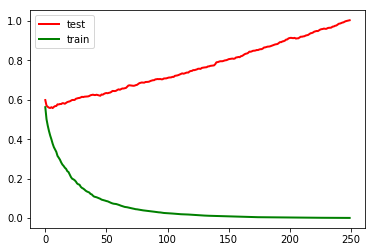

Min loss 0.56 at n_estimators=7

Learning rate: 0.3
      Iter       Train Loss   Remaining Time 
         1           1.2095           16.55s
         2           1.1006           15.14s
         3           1.0240           14.27s
         4           0.9729           14.92s
         5           0.9387           13.92s
         6           0.8948           13.88s
         7           0.8621           13.82s
         8           0.8360           13.74s
         9           0.8171           13.35s
        10           0.7883           13.11s
        20           0.6164           11.37s
        30           0.4933           10.59s
        40           0.4248            9.72s
        50           0.3345            9.27s
        60           0.2760            8.69s
        70           0.2263            8.20s
        80           0.1971            7.65s
        90           0.1693            7.15s
       100           0.1388            6.74s


In [ ]:
def plot_loss(learning_rate: float, test_loss: List[float], train_loss: List[float]):
    plt.figure()
    plt.plot(test_loss, "r", linewidth=2)
    plt.plot(train_loss, "g", linewidth=2)
    plt.legend(["test", "train"])
    plt.show()

min_loss_results = {}
for lr in [1, 0.5, 0.3, 0.2, 0.1]:
    print(f"Learning rate: {lr}")

    model = GradientBoostingClassifier(learning_rate=lr, n_estimators=250, verbose=True, random_state=241)
    model.fit(X_train, y_train)
    
    train_loss = log_loss_results(model, X_train, y_train)
    test_loss = log_loss_results(model, X_test, y_test)
    plot_loss(lr, test_loss, train_loss)
    
    min_loss_value = min(test_loss)
    min_loss_index = test_loss.index(min_loss_value) + 1
    min_loss_results[lr] = min_loss_value, min_loss_index

    print(f"Min loss {min_loss_value:.2f} at n_estimators={min_loss_index}\n")

## 3. Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (overfitting) или недообучение (underfitting)?

В ответе укажите одно из слов overfitting либо underfitting.

In [ ]:
print_answer(1, "overfitting")

## 4. Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2.

In [ ]:
min_loss_value, min_loss_index = min_loss_results[0.2]
print_answer(2, f"{min_loss_value:.2f} {min_loss_index}")

## 5. На этих же данных обучите RandomForestClassifier

с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно)

In [ ]:
model = RandomForestClassifier(n_estimators=min_loss_index, random_state=241)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:, 1]
test_loss = log_loss(y_test, y_pred)

print_answer(3, f"{test_loss:.2f}")